# Gabriella Colletti
# Machine Learning: Supervised Learning

### Classifiers

The following classification accuracies for the following classifiers:  (1) Decision Tree, (2) Naive Bayes Classifier, (3) Linear Support Vector Classifier, (4) Multi-Layer Perceptron Classifier, and (5) Random Forest are displayed in the table in below:

| Classifier               |     Naive Bayes |             SVC |  Neural Network |   Decision Tree |   Random Forest |
|--------------------------|----------------:|----------------:|----------------:|----------------:|----------------:|
| 10-Fold CV Mean Accuracy | 0.9147 ± 0.0858 | 0.9828 ± 0.0469 | 0.9633 ± 0.0904 | 0.9683 ± 0.0944 | 0.9640 ± 0.0939 |

Across 10-fold cross validation we find that the Random Forest, Neural Network ( Multi-Layer Perceptron Classifier) and Decision Tree classified with mean accuracies of 96%, while the SVC performed the best with 98%, and Naive Bayes performed the worst with 91%.  We see that the full classifier Decision Tree and Random Forest comprised of weak Decision Tree Classifiers, perform nearly identically. This is likely because an ensemble of weak classifiers can improve the accuacy of a weak classifier to match the accuracy, and in certain applications, surpass, that of a full classifier. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
import random

In [2]:
def cross_validation(X, Y, model):
    '''Arguments: X: Dependent variable matrix data
                    Y: Independent variable vector data
                    model: instantiated classifier
    Returns: list of 10 fold accuracies, and mean accuracies of classifier for 10-CV'''
    accuracies = []
    fold = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)
    for train_index, test_index in fold.split(X, Y):
        model.fit(X[train_index],Y[train_index])
        accuracies.append(accuracy_score(model.predict(X[test_index]),Y[test_index]) ) # Accuracy 
    accuracies.append(str('%.4f' %np.mean(accuracies)) +' ± ' + str('%.4f' %np.std(accuracies)))
    return accuracies

In [3]:
def display_results(models, names):
    '''Arguments: models: list of classifiers
                  names: list of string descriptors of classifiers
       - Displays 10-CV Accuracies and Mean for tested classifiers'''
    
    # Data Processing
    data = pd.read_csv('datasets/mushroom.csv')    # Load Data
    cols = list(data.columns)
    cols.remove('class')
    data = pd.get_dummies(data, columns=cols)
    Y = data['class'].astype('category').cat.codes.values
    X = data.iloc[:, 1:].values
    
    #=============== RUN 10-CV ======================#
    table= {}
    for idx in range(len(models)):
        scores = cross_validation(X, Y, models[idx])
        table[names[idx]]=scores
    display(pd.DataFrame(table, index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6',
                                         'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10','MEAN 10-CV Classification Accuracy']))


### Run Classifiers

In [4]:
#================ CLASSIFIERS ==================#
naive_bayes = GaussianNB()                             # Naive Bayes
svm = SVC(kernel = 'linear', probability=True)         # Linear Support Vector Classifier
neural_net = MLPClassifier()                           # Neural Network
tree = DecisionTreeClassifier()                        # Decision Tree
forest = RandomForestClassifier()                      # Random Forest

# Display Results
models = [naive_bayes,svm,neural_net,tree,forest]
names= ['Naive Bayes', 'SVC', 'Neural Network', 'Decision Tree', 'Random Forest']
display_results(models, names)

,Naive Bayes,SVC,Neural Network,Decision Tree,Random Forest
Fold 1,0.683887,0.842558,0.685117,0.685117,0.685117
Fold 2,0.9631,1.0,1.0,1.0,1.0
Fold 3,0.98155,1.0,1.0,1.0,1.0
Fold 4,0.98032,1.0,1.0,1.0,1.0
Fold 5,0.971675,1.0,1.0,0.997537,1.0
Fold 6,0.964286,1.0,1.0,1.0,1.0
Fold 7,0.894089,1.0,1.0,1.0,1.0
Fold 8,0.864532,1.0,1.0,1.0,1.0
Fold 9,0.935961,0.985222,0.926108,1.0,0.958128
Fold 10,0.907635,1.0,1.0,1.0,1.0


### Creating Ensembles of Weak Classifiers

Using List Comprehension we generate an ensemble of 100 classifiers, in the form of a list, for each of the following classifiers: (1) Decision Tree, (2) Naive Bayes Classifier, (3) Linear Support Vector Classifier, and (4) Multi-Layer Perceptron Classifier. The first classifier in each ensemble's list's 10-fold CV mean accuracy is as follows: 

| Classifier               |   Decision Tree |     Naive Bayes |  Neural Network |             SVC |
|--------------------------|----------------:|----------------:|----------------:|----------------:|
| 10-Fold CV Mean Accuracy | 0.8570 ± 0.1457 | 0.9146 ± 0.0858 | 0.8491 ± 0.1491 | 0.9843 ± 0.0472 |

Given these new initial parameters for the neural network and decision tree, we see reduced accuracy rates. The full neural network classifer's accuracy drops from 96% to 84% for the weak neural network classifier. Similarly, the full decision tree classifier's accuracy drops from 96% to 85% in the weak decision tree classifier.  This is likely because in Question 1, we have full classifiers that are not handicapped by parameters, wherease now, in Question 2, the use of parameters, which reduce their sizes, causes the classifier to be weak. Comparatively, the Naive Bayes and SVC perform comparably to what they did in Question 1 since they were unchanged. 

Since we define an ensemble as composed of weak, abstract classifiers, we technically would not consider the ensemble of Naive Bayes and SVC full classifiers as an ensemble. Additionally, we would not expect the Naive Bayes and SVC "ensemble" to improve the classification accuracy of the full Naive Bayes and SVC classifiers, respectively. Comparatively, for the Decision Tree and Neural Network, as an ensemble, we expect the other 99 classifiers to improve the ensembles entire accuracy, since they have weak classifiers and their combined majority prediction is likely more accurate than any one individual weak classifier. Furthermore, we might expect the full ensemble of the decision tree to have a comparable accuracy to the random forest, since they are both composed of weak decision tree as an ensemble. Comparatively, we expect the ensembles of the SVC and the Naive Bayes to not improve classification accuracies since we do not expect the full classifier to be improved by an ensemble of full classifiers. 



In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble Lists
ensemble_neural_net = [MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol=1e-1) for idx in range(100)] # Neural Network
ensemble_decision_tree = [ DecisionTreeClassifier(max_depth=5, max_features=5) for idx in range(100)]        # Decision Tree
ensemble_naive_bayes = [GaussianNB()  for idx in range(100)]                                                 # Naive Bayes
ensemble_svm = [SVC(kernel = 'linear', probability=True)  for idx in range(100)]                             # Linear SVC

# Run 10-CV
ensembles = [ensemble_neural_net[0], ensemble_decision_tree[0], ensemble_naive_bayes[0], ensemble_svm[0] ]
names= [ 'Neural Network', 'Decision Tree', 'Naive Bayes', 'SVC']
display_results(ensembles, names)
    

,Neural Network,Decision Tree,Naive Bayes,SVC
Fold 1,0.693727,0.619926,0.683887,0.842558
Fold 2,0.949569,0.624846,0.9631,1.0
Fold 3,0.99877,0.96433,0.98155,1.0
Fold 4,1.0,0.940959,0.98032,1.0
Fold 5,0.986453,0.964286,0.971675,1.0
Fold 6,0.966749,1.0,0.964286,1.0
Fold 7,0.481527,0.80665,0.894089,1.0
Fold 8,1.0,1.0,0.864532,1.0
Fold 9,0.770936,0.83867,0.935961,0.985222
Fold 10,0.980296,0.971675,0.907635,1.0


### Effects of Subsampling Training Data

Below is the ensemble_fit function that trains each classifier in the ensemble list with a subsampling of the input data, as desired.

In [6]:
from math import ceil
def ensemble_fit(ensemble, X, Y, ratio):
    '''Arguments: ensemble: list of 100 instantiated weak classifiers
                  ratio: the decimal value representing the amount of the subsample of the training set to train the 
                         classifiers on
                  X,Y: the X and Y matrix representing the training data's dependent and indendepent data values
    Returns: The inputed, classifier-individually-trained, ensemble '''
    train_index =[ idx for idx in range(len(Y))]
    for idx in range(len(ensemble)):
        if len(ensemble) > 1:
            assert ensemble[idx]!= ensemble[idx-1]    # Asserting each classifier is pairwise different
        sample_indices =[]
        while len(np.unique(Y[sample_indices])) != 2:
             sample_indices = random.sample(train_index, k=ceil(ratio*len(Y)))  # Random Selection for Subsample training set indices
        ensemble[idx].fit(X[sample_indices],Y[sample_indices])
    return ensemble

Below is the ensemble_predict function that given a trained ensemble list, tests on the input X matrix, and returns the majority predictions across the ensemble's classifiers for each of datapoints.

In [7]:
def ensemble_predict(ensemble, X):
    '''Arguments:    ensemble: list of 100 instantiated weak classifiers
                     X: the X matrix representing the data's dependent data values
    Returns: majority_predictions: a list of the majority voted predictions for the ensemble
    '''
    scores = np.zeros((len(X), 2))   # Initialize a 8124 x 2 array of zeros
    # Collects the individual tuple of predicted probability for each of the class labels (0 or 1) for all test points
    for classifier in ensemble: # for all classifiers in the ensembles
        prediction = classifier.predict_proba(X)
        for idx in range(len(X)):  #Sums each of the probabilies for a given data point across all classifiers
            scores[idx] += prediction[idx]
    majority_predictions = np.argmax(scores, axis=1) # Chooses the more likely prediction for all datapoints
   #np.argmax returns the 0 or 1 index which corresponds to the 0 or 1 class labels
    return majority_predictions

### Performance on different subsample amounts

The 10-fold CV performance of the ensembles for the subsample ratio of 0.1 and 0.001 are below:
- **Ratio = 0.1**

| Classifier               | Ensemble Decision Tree | Ensemble Naive Bayes | Ensemble Neural Network | Ensemble SVC | Regular Decision Tree |
|--------------------------|-----------------------:|---------------------:|------------------------:|-------------:|----------------------:|
| 10-Fold CV Mean Accuracy |               0.942776 |             0.842301 |                0.762262 |     0.932016 |              0.996798 |

- **Ratio = 0.001**

| Classifier               | Ensemble Decision Tree | Ensemble Naive Bayes | Ensemble Neural Network | Ensemble SVC | Regular Decision Tree |
|--------------------------|-----------------------:|---------------------:|------------------------:|-------------:|----------------------:|
| 10-Fold CV Mean Accuracy |               0.901566 |             0.888113 |                0.492606 |     0.887053 |              0.616720 |


We find that with more training data, when comparing a subsampling ratio of 0.001 and 0.1, there is improved accuracy. This is likely due to better classification abilities (i.e. refinement of the classifier) given more datapoints. We see that the ensemble decision tree outperformed the regular decision tree, for the ratio of 0.001, by about 30% while the regular decision tree outperformed the ensemble decision tree by about 5% for the ratio of 0.1. This indicates that perhaps with varying subsampling ratios the ensemble is capable of improving a full classifier, particularly in instance of low ratio subsampling. We anticipate with larger subsampling ratios that the accuracy of the full classifiers will begin to grow and have comparable accuracies to ensembles, and/or that ensembles will have an initial advantage in classification accuracy given its constructive inteference of prediction capabilities with its weak classifiers. This is because a weak classifier ensemble is capable of improving the classification accuracy of a single weak classifier to be comparable to a full classifier, and at times surpass the full classifier. We find that the ensembles that use full classifiers, NB and SVC, performed similarly at 88%.  This is likely because these ensembles that use non-weak classifiers have an baseline classifying capacity that corresponds to its full classifier counterpart. Thus, we might expect the SVC ensemble and NB ensemble to perform comparably to the SVC classifier and NB classifier. 


In [8]:
def ensemble_cross_validation(X,Y, ensemble, ratio):
    fold = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)     
    fold_accuracies = []
    for train_index, test_index in fold.split(X,Y):
        ensemble = ensemble_fit(ensemble,X[train_index], Y[train_index], ratio)       # Training 
        predictions = ensemble_predict(ensemble, X[test_index])
        fold_accuracies.append(accuracy_score(predictions, Y[test_index])) # Accuracy
    fold_accuracies.append(np.mean(fold_accuracies))
    return fold_accuracies

In [9]:
def main(ratio):
    regular_dt =  DecisionTreeClassifier()                        # Decision Tree
    # Ensemble Lists
    ensemble_neural_net = [MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol=1e-1) for idx in range(100)]                 # Neural Network
    ensemble_decision_tree = [ DecisionTreeClassifier(max_depth=5, max_features=5) for idx in range(100)] # Decision Tree
    ensemble_naive_bayes = [GaussianNB()  for idx in range(100)]                                          # Naive Bayes
    ensemble_svm = [SVC(kernel = 'linear', probability=True)  for idx in range(100)]                                                    # Linear SVC
    ensembles = [ensemble_neural_net, ensemble_decision_tree, ensemble_naive_bayes, ensemble_svm, [regular_dt]]
    names= [ 'Ensemble Neural Network', 'Ensemble Decision Tree', 'Ensemble Naive Bayes', 'Ensemble SVC', 
           'Regular Decision Tree']

    # Data Processing
    data = pd.read_csv('datasets/mushroom.csv')    # Load Data
    cols = list(data.columns)
    cols.remove('class')
    data = pd.get_dummies(data, columns=cols)
    Y = data['class'].astype('category').cat.codes.values
    X = data.iloc[:, 1:].values

    #Display Results
    table= {}
    for idx in range(len(ensembles)):
        scores = ensemble_cross_validation(X,Y, ensembles[idx], ratio)
        table[names[idx]]=scores

    display(pd.DataFrame(table, index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6',
                                     'Fold 7', 'Fold 8', 'Fold 9', 'Fold 1o','MEAN 10-CV Classification Accuracy']))

### Subsample ratio of 0.1 

In [10]:
main(0.1)

,Ensemble Neural Network,Ensemble Decision Tree,Ensemble Naive Bayes,Ensemble SVC,Regular Decision Tree
Fold 1,0.621156,0.685117,0.683887,0.686347,1.000000
Fold 2,0.843788,0.979090,0.963100,1.000000,1.000000
Fold 3,0.974170,0.997540,0.926199,0.998770,0.997540
Fold 4,0.960640,0.992620,0.926199,1.000000,0.996310
Fold 5,0.809113,0.953202,0.863300,0.993842,0.993842
Fold 6,0.812808,0.947044,0.820197,0.997537,0.992611
Fold 7,1.000000,1.000000,0.849754,1.000000,1.000000
Fold 8,0.998768,1.000000,0.790640,1.000000,1.000000
Fold 9,0.865764,0.884236,0.759852,0.649015,1.000000
Fold 1o,0.982759,1.000000,0.901478,0.995074,0.983990


### Subsample ratio of 0.001

In [11]:
main(0.001)

,Ensemble Neural Network,Ensemble Decision Tree,Ensemble Naive Bayes,Ensemble SVC,Regular Decision Tree
Fold 1,0.520295,0.619926,0.630996,0.619926,0.517835
Fold 2,0.635916,0.884379,0.859779,0.841328,0.607626
Fold 3,0.939729,0.976630,0.991390,0.970480,0.885609
Fold 4,0.599016,0.956950,0.986470,0.954490,0.536285
Fold 5,0.482759,0.804187,0.810345,0.809113,0.927340
Fold 6,0.482759,0.809113,0.822660,0.800493,0.885468
Fold 7,0.729064,1.000000,1.000000,1.000000,0.582512
Fold 8,0.522167,0.997537,0.998768,0.997537,0.662562
Fold 9,0.518473,0.875616,0.656404,0.921182,0.701970
Fold 1o,0.921182,0.967980,0.933498,0.960591,0.980296


# Run Ensemeble vs Regular Classifiers



In [12]:
def main_6(ratio):
    #=============== Ensemble Lists ===============#
    ensemble_neural_net = [MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol=1e-1) for idx in range(100)]                 # Neural Network
    ensemble_decision_tree = [ DecisionTreeClassifier(max_depth=5, max_features=5) for idx in range(100)] # Decision Tree
    ensemble_naive_bayes = [GaussianNB()  for idx in range(100)]                                          # Naive Bayes
    ensemble_svm = [SVC(kernel = 'linear', probability=True)  for idx in range(100)]                                                    # Linear SVC

    
    #================ CLASSIFIERS ==================#
    naive_bayes = GaussianNB()                             # Naive Bayes
    svm = SVC(kernel = 'linear', probability=True)         # Linear Support Vector Classifier
    neural_net = MLPClassifier()                           # Neural Network
    tree = DecisionTreeClassifier()                        # Decision Tree
    forest = RandomForestClassifier()                      # Random Forest


    ensembles = [ensemble_neural_net, ensemble_decision_tree, ensemble_naive_bayes, ensemble_svm,  
                 [naive_bayes],[svm],[neural_net],[tree],[forest]]
    names= [ 'Ensemble Neural Network', 'Ensemble Decision Tree', 'Ensemble Naive Bayes', 'Ensemble SVC', 
           'Regular Naive Bayes', 'Regular SVC', 'Regular Neural Network', 'Regular Decision Tree', 'Regular Random Forest']

    # Data Processing
    data = pd.read_csv('datasets/mushroom.csv')    # Load Data
    cols = list(data.columns)
    cols.remove('class')
    data = pd.get_dummies(data, columns=cols)
    Y = data['class'].astype('category').cat.codes.values
    X = data.iloc[:, 1:].values
    
    #Display Results
    table= {}
    for idx in range(len(ensembles)):
        scores = ensemble_cross_validation(X,Y, ensembles[idx], ratio)
        table[names[idx]]=scores
    display(pd.DataFrame(table, index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6',
                                     'Fold 7', 'Fold 8', 'Fold 9', 'Fold 1o','MEAN 10-CV Classification Accuracy']))

### Subsample ratio of 0.0005

In [13]:
main_6(0.0005)

,Ensemble Neural Network,Ensemble Decision Tree,Ensemble Naive Bayes,Ensemble SVC,Regular Naive Bayes,Regular SVC,Regular Neural Network,Regular Decision Tree,Regular Random Forest
Fold 1,0.482165,0.617466,0.619926,0.311193,0.619926,0.482165,0.501845,0.517835,0.487085
Fold 2,0.539975,0.861009,0.841328,0.143911,0.501845,0.480935,0.517835,0.622386,0.539975
Fold 3,0.489545,0.970480,0.971710,0.246002,0.822878,0.479705,0.970480,0.964330,0.519065
Fold 4,0.517835,0.976630,0.954490,0.013530,0.739237,0.482165,0.531365,0.517835,0.498155
Fold 5,0.483990,0.809113,0.809113,0.408867,0.915025,0.402709,0.482759,0.610837,0.628079
Fold 6,0.482759,0.825123,0.800493,0.052956,0.783251,0.482759,0.865764,0.678571,0.495074
Fold 7,0.518473,1.000000,0.998768,0.000000,0.487685,0.518473,0.483990,0.998768,0.578818
Fold 8,0.481527,0.998768,0.997537,0.002463,0.533251,0.490148,0.485222,0.599754,0.481527
Fold 9,0.543103,0.912562,0.866995,0.460591,0.481527,0.517241,0.511084,0.684729,0.486453
Fold 1o,0.518473,0.876847,0.756158,0.023399,0.518473,0.587438,0.798030,0.518473,0.784483


### Subsample ratio 0.001

In [14]:
main_6(0.001)

,Ensemble Neural Network,Ensemble Decision Tree,Ensemble Naive Bayes,Ensemble SVC,Regular Naive Bayes,Regular SVC,Regular Neural Network,Regular Decision Tree,Regular Random Forest
Fold 1,0.482165,0.624846,0.619926,0.619926,0.752768,0.611316,0.576876,0.619926,0.619926
Fold 2,0.583026,0.900369,0.847478,0.841328,0.840098,0.511685,0.821648,0.842558,0.841328
Fold 3,0.517835,0.975400,0.988930,0.970480,0.660517,0.863469,0.970480,0.964330,0.832718
Fold 4,0.517835,0.959410,0.959410,0.954490,0.613776,0.944649,0.954490,0.536285,0.731857
Fold 5,0.517241,0.810345,0.831281,0.809113,0.711823,0.747537,0.854680,0.809113,0.786946
Fold 6,0.482759,0.832512,0.816502,0.800493,0.666256,0.517241,0.716749,0.937192,0.896552
Fold 7,0.959360,0.998768,1.000000,1.000000,0.865764,1.000000,0.993842,0.752463,0.487685
Fold 8,0.823892,0.996305,0.997537,0.997537,0.518473,0.998768,0.969212,0.751232,0.995074
Fold 9,0.950739,0.980296,0.873153,0.884236,0.758621,0.545567,0.751232,0.963054,0.918719
Fold 1o,0.935961,0.974138,0.970443,0.956897,0.482759,0.534483,0.519704,0.995074,0.814039


### Subsample ratio of 0.005

In [15]:
main_6(0.005)

,Ensemble Neural Network,Ensemble Decision Tree,Ensemble Naive Bayes,Ensemble SVC,Regular Naive Bayes,Regular SVC,Regular Neural Network,Regular Decision Tree,Regular Random Forest
Fold 1,0.619926,0.678967,0.646986,0.671587,0.761378,0.619926,0.682657,0.619926,0.674047
Fold 2,0.487085,0.878229,0.875769,0.932349,0.836408,0.826568,0.846248,0.607626,0.947109
Fold 3,0.907749,0.993850,0.990160,0.997540,0.987700,0.971710,0.970480,0.975400,0.974170
Fold 4,0.517835,0.990160,0.988930,0.992620,0.975400,0.984010,0.948339,0.982780,0.904059
Fold 5,0.689655,0.959360,0.956897,0.965517,0.932266,0.938424,0.960591,0.964286,0.949507
Fold 6,0.806650,0.900246,0.944581,0.947044,0.942118,0.997537,0.809113,0.937192,0.933498
Fold 7,1.000000,1.000000,0.998768,0.998768,0.998768,1.000000,0.998768,1.000000,1.000000
Fold 8,0.695813,0.998768,0.997537,0.996305,0.998768,0.997537,0.997537,1.000000,0.998768
Fold 9,0.950739,0.881773,0.864532,0.875616,0.954433,0.847291,0.777094,0.995074,0.884236
Fold 1o,0.879310,0.995074,0.884236,0.985222,0.740148,0.933498,0.490148,0.995074,0.836207


### Subsample ratio of 0.01

In [16]:
main_6(0.01)

,Ensemble Neural Network,Ensemble Decision Tree,Ensemble Naive Bayes,Ensemble SVC,Regular Naive Bayes,Regular SVC,Regular Neural Network,Regular Decision Tree,Regular Random Forest
Fold 1,0.619926,0.649446,0.649446,0.685117,0.661747,0.619926,0.777368,0.985240,0.646986
Fold 2,0.517835,0.952030,0.874539,0.974170,0.731857,0.847478,0.977860,0.841328,0.924969
Fold 3,0.613776,0.997540,0.991390,0.996310,0.990160,0.990160,0.971710,0.984010,0.975400
Fold 4,0.762608,0.991390,0.988930,0.991390,0.920049,0.984010,0.981550,0.995080,0.996310
Fold 5,0.517241,0.915025,0.950739,0.959360,0.798030,0.996305,0.956897,0.937192,0.947044
Fold 6,0.527094,0.944581,0.940887,0.947044,0.937192,0.939655,0.911330,0.937192,0.940887
Fold 7,0.998768,1.000000,0.991379,0.998768,1.000000,1.000000,1.000000,1.000000,0.998768
Fold 8,0.800493,1.000000,0.966749,0.998768,0.997537,0.998768,0.991379,0.998768,0.998768
Fold 9,0.518473,0.911330,0.862069,0.874384,0.822660,0.727833,0.852217,0.972906,0.884236
Fold 1o,0.710591,0.996305,0.866995,0.982759,0.732759,0.703202,0.995074,0.860837,0.975369


### Subsample ratio of 0.03

In [17]:
main_6(0.03)

,Ensemble Neural Network,Ensemble Decision Tree,Ensemble Naive Bayes,Ensemble SVC,Regular Naive Bayes,Regular SVC,Regular Neural Network,Regular Decision Tree,Regular Random Forest
Fold 1,0.616236,0.685117,0.683887,0.685117,0.756458,0.829028,0.683887,0.685117,0.685117
Fold 2,0.528905,0.984010,0.942189,1.000000,0.932349,0.908979,0.993850,0.950800,0.950800
Fold 3,0.974170,0.997540,0.963100,0.998770,0.956950,0.998770,0.995080,0.998770,0.990160
Fold 4,0.954490,0.992620,0.902829,1.000000,0.779828,0.993850,0.997540,0.996310,0.992620
Fold 5,0.841133,0.965517,0.854680,0.971675,0.754926,0.993842,0.976601,0.980296,0.943350
Fold 6,0.746305,0.947044,0.789409,0.958128,0.960591,0.980296,0.961823,0.997537,0.956897
Fold 7,0.651478,1.000000,0.852217,1.000000,0.852217,1.000000,0.998768,1.000000,0.998768
Fold 8,0.950739,1.000000,0.767241,1.000000,0.816502,1.000000,1.000000,1.000000,1.000000
Fold 9,0.837438,0.900246,0.731527,0.714286,0.710591,0.772167,0.727833,0.996305,0.947044
Fold 1o,0.976601,0.995074,0.913793,0.993842,0.756158,0.995074,0.961823,0.995074,0.985222


### Subsample ratio of 0.05 

In [18]:
main_6(0.05)

,Ensemble Neural Network,Ensemble Decision Tree,Ensemble Naive Bayes,Ensemble SVC,Regular Naive Bayes,Regular SVC,Regular Neural Network,Regular Decision Tree,Regular Random Forest
Fold 1,0.619926,0.682657,0.683887,0.685117,0.683887,0.672817,0.697417,0.685117,0.685117
Fold 2,0.892989,0.926199,0.954490,1.000000,0.947109,0.977860,0.954490,1.000000,0.986470
Fold 3,0.971710,0.997540,0.940959,0.998770,0.988930,0.998770,0.998770,0.996310,0.998770
Fold 4,0.965560,0.992620,0.900369,1.000000,0.918819,0.998770,0.993850,0.995080,1.000000
Fold 5,0.847291,0.961823,0.862069,0.983990,0.753695,0.993842,0.970443,0.943350,0.965517
Fold 6,0.878079,0.939655,0.812808,0.997537,0.790640,0.995074,0.983990,0.966749,0.993842
Fold 7,0.998768,1.000000,0.852217,1.000000,0.832512,1.000000,1.000000,1.000000,1.000000
Fold 8,0.998768,1.000000,0.816502,1.000000,0.753695,1.000000,1.000000,1.000000,1.000000
Fold 9,0.481527,0.884236,0.753695,0.644089,0.716749,0.683498,0.757389,0.995074,0.935961
Fold 1o,0.518473,0.998768,0.890394,0.995074,0.894089,0.980296,0.950739,0.995074,1.000000


###  Subsample ratio of 0.1

In [19]:
main_6(0.1)

,Ensemble Neural Network,Ensemble Decision Tree,Ensemble Naive Bayes,Ensemble SVC,Regular Naive Bayes,Regular SVC,Regular Neural Network,Regular Decision Tree,Regular Random Forest
Fold 1,0.619926,0.685117,0.683887,0.685117,0.683887,0.734317,0.696187,0.685117,0.685117
Fold 2,0.841328,0.998770,0.963100,1.000000,0.963100,1.000000,0.988930,1.000000,1.000000
Fold 3,0.970480,0.997540,0.936039,0.998770,0.897909,1.000000,0.995080,0.998770,1.000000
Fold 4,0.980320,0.992620,0.926199,1.000000,0.997540,1.000000,0.998770,1.000000,1.000000
Fold 5,0.809113,0.960591,0.863300,0.993842,0.862069,1.000000,0.993842,0.993842,0.972906
Fold 6,0.800493,0.947044,0.828818,0.997537,0.927340,0.997537,1.000000,0.997537,0.986453
Fold 7,1.000000,1.000000,0.852217,1.000000,0.944581,1.000000,1.000000,1.000000,1.000000
Fold 8,0.997537,1.000000,0.816502,1.000000,0.816502,1.000000,1.000000,1.000000,1.000000
Fold 9,0.642857,0.922414,0.759852,0.649015,0.834975,0.649015,0.855911,1.000000,0.916256
Fold 1o,0.998768,1.000000,0.887931,0.993842,0.933498,0.986453,0.993842,1.000000,0.987685


### Graph Subsample Ratio to Performance

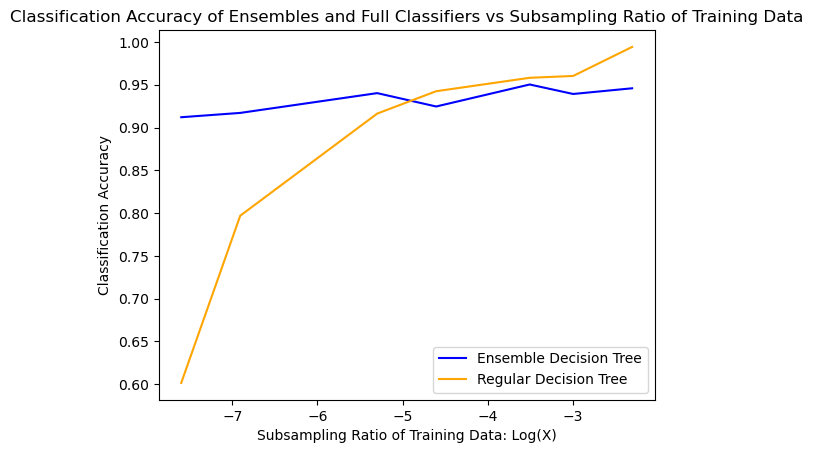

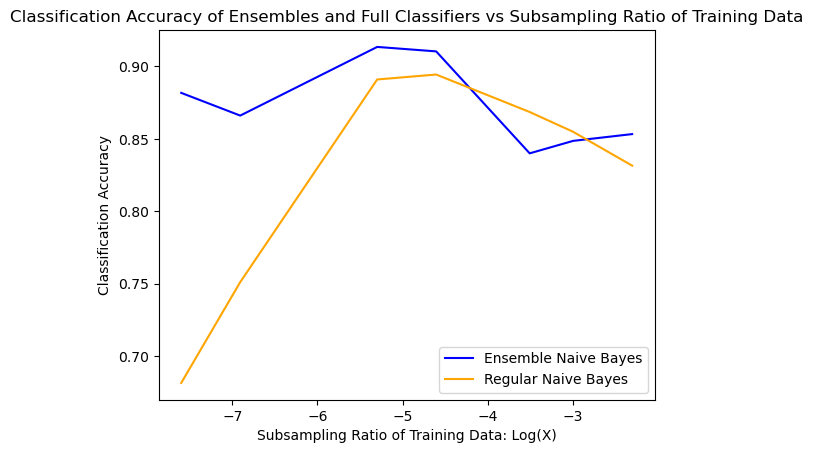

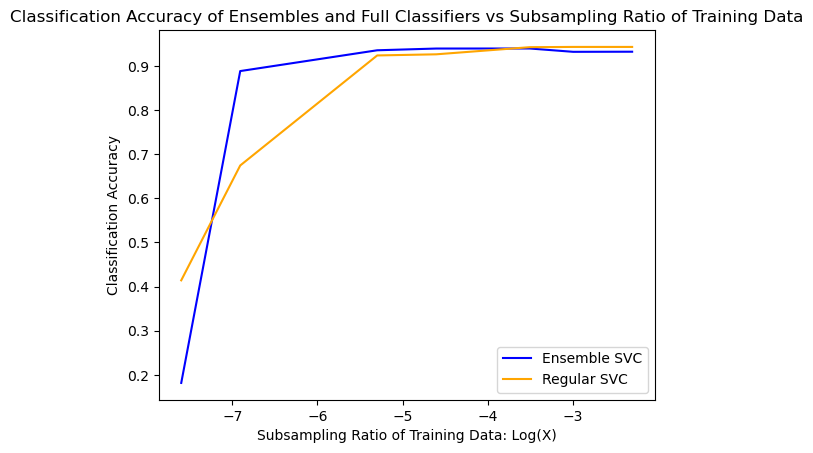

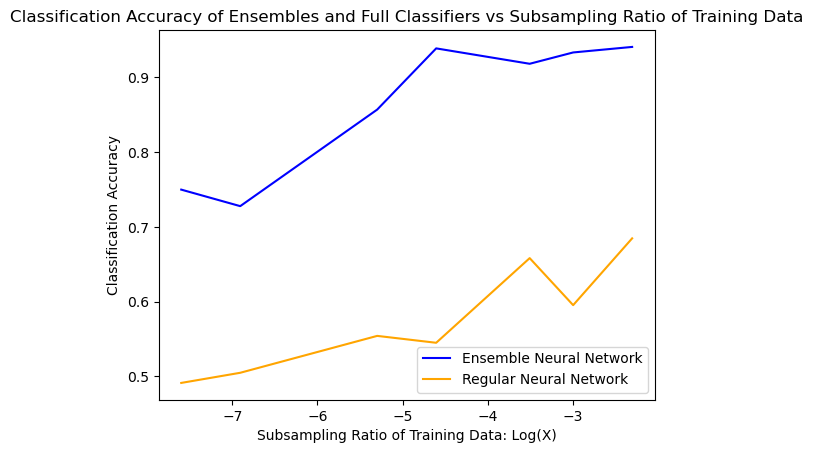

In [20]:
import matplotlib.pyplot as plt
import numpy as np
x = [0.0005,0.001,0.005,0.01,0.03,0.05,0.1]
tree_e=[0.912028,0.917075,0.940202,0.924571,0.950291,0.93921,0.945854]
nb_e =[0.881727,0.866047,0.913467,0.910383,0.839964,0.848581,0.853255]
nn_e= [0.749734,0.727636,0.856746,0.938584,0.918002,0.933133,0.940538]
svc_e = [0.181593,0.88804,0.935146,0.939076,0.939183,0.931648,0.931893]
tree= [0.601445,0.796906,0.916272,0.94243,0.95812,0.960266,0.99421]
nb = [0.6814,0.751028,0.890986,0.894391,0.868524,0.854839,0.831468]
nn = [0.491257,0.504813,0.554151,0.544934,0.658127,0.595254,0.68456]
rf = [0.738374,0.745546,0.908087,0.906671,0.93639,0.941548,0.950894]
svc = [0.413974,0.674177,0.923432,0.925991,0.942153,0.942745,0.942733]

def graph(x,y1, y2, labels):
    plt.plot(np.log(x), y1, color='blue', label = labels[0]) 
    plt.plot(np.log(x), y2, color='orange', label = labels[1])
    plt.xlabel('Subsampling Ratio of Training Data: Log(X)') 
    plt.ylabel('Classification Accuracy') 
    plt.legend(loc = 'lower right')
    plt.title("Classification Accuracy of Ensembles and Full Classifiers vs Subsampling Ratio of Training Data")
    plt.show()

graph(x, tree_e,tree, ['Ensemble Decision Tree', 'Regular Decision Tree'])
graph(x,nb_e, nb,['Ensemble Naive Bayes','Regular Naive Bayes' ] )
graph(x, svc_e,svc, ['Ensemble SVC', 'Regular SVC'])
graph(x, nn_e, nn,['Ensemble Neural Network', 'Regular Neural Network'] )

### Anaylsis 

- We find the full SVC classifier and the ensemble that used full (non-weak) SVC classifier had similar performances. This is likely because a full classifier can only be improved so much given training data (e.g. a hyerplane can only be fitted so well given data) until its best classification accuracy can be made. Thus, using full classifier in the ensemble, we suggest that the individual classifiers cumulatively came to the performance cap as a typical full classifier. This is depicted in the similar performance between the ensemble and classifier. However, while the NB ensemble did use full (non-weak) NB classifiers, their performances were not as aligned as their SVC ensemble/classifier counterpart. Initially, the ensemble outperformed the NB classifier, and then with larger subsampling ratios the ensemble and classifier performed similarly, intersecting in classification accuracy twice. The weak performance initially for the traditional NB classifier, may simply be due to lack of data points, and suggests that some ensembles may be able to produce a more consistent performance despite smaller training subsamples due to is majority voting technique. 

- Comparatively, for the ensembles that used weak classifiers (NN and DT) we have varying data. The DT ensemble provided a continuous classification accuracy in the 90%+, whereas the decision tree classifier grew into that 90%+ classification accuracy. This agains suggests that for the DT application, the use of DT ensemble provides high accuracy despite small sampling sizes for the training data. Overall, the DT ensemble and classifier support the trend that ensembles do have comparable performance metrics with full, non-weak classifiers, as well as the ability to outperform full classifiers. Comparatively, the ensemble neural network outperformed the regular neural network. This is the expected trend for ensembles. We anticipate that all ensembles of weak classifiers' classification accuracy will grow to match and improve the classification accuracy of their full, non-weak classifier's counterpart; and in the special case of the decision tree, ensemble of weak decision trees, and random forest, we expect that these classification accuracy become comparable with enough training data. This is because the ensemble of weak decision trees and the random forest are both ensembles of decision trees, and because we expect ensembles of weak classifiers to eventually replicate the performance metrics of their non-weak classifier counterparts. 


